<a href="https://colab.research.google.com/github/bjh0507/Study/blob/main/Data_Science_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [137]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 9
plt.rcParams['figure.figsize'] = (9,5)
plt.rcParams['figure.facecolor'] = '#00000000'

In [138]:
df = pd.read_csv('/content/ds_salaries.csv')
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [139]:
print(len(df))

3755


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [141]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

#EDA

In [142]:
#연봉 top10 직무
top10_job = pd.DataFrame(df.groupby('job_title')['salary'].mean()).round(2).sort_values(by='salary', ascending=False).reset_index().head(10)
top10_job

,job_title,salary
0,Head of Machine Learning,6000000.00
1,Principal Data Architect,3000000.00
2,Lead Machine Learning Engineer,2548666.67
3,Lead Data Scientist,928485.33
4,Data Analytics Lead,922500.00
5,BI Data Analyst,836644.80
6,Head of Data Science,703729.44
7,Lead Data Analyst,655000.00
8,ML Engineer,609997.91
9,Product Data Analyst,412000.00


<Axes: xlabel='job_title', ylabel='salary'>

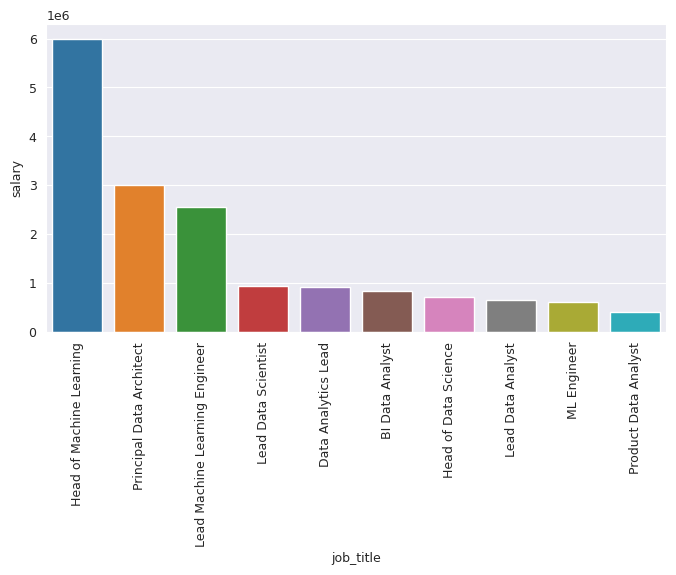

In [143]:
plt.figure(figsize=(8,4)) #그래프 사이즈 조정
plt.xticks(rotation=90) #그래프 회전

sns.barplot(data=top10_job,  x='job_title', y='salary')

In [144]:
#경험에 따른 평균 연봉
df_experience = pd.DataFrame(df.groupby('experience_level')['salary'].mean()).round(2).sort_values(by='salary', ascending=False).reset_index()
df_experience

,experience_level,salary
0,MI,248200.31
1,EX,246802.20
2,EN,188381.18
3,SE,170048.97


<Axes: xlabel='experience_level', ylabel='salary'>

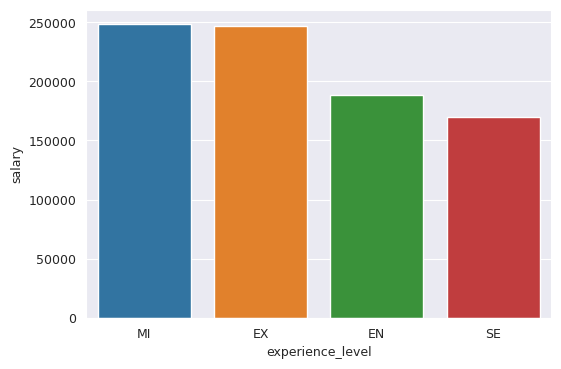

In [145]:
plt.figure(figsize=(6,4))
sns.barplot(data=df_experience, x='experience_level', y='salary')

In [146]:
#경험별 직무별 평균 연봉
len(df['job_title'].unique())

93

93개의 직무는 너무 많기 때문에 시각화를 좀 더 명확하게 진행하기 위해 value_counts()로 상위 top10 직종을 추출해 시각화를 수행

In [147]:
job_10 = df.job_title.value_counts().head(10)
job_10

Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Data Science Manager           58
Applied Scientist              58
Research Engineer              37
Name: job_title, dtype: int64

In [148]:
import itertools

name_job = job_10.index.tolist()
index_job = [df[df['job_title']==i].index for i in name_job]
index_job = list(itertools.chain(*index_job)) #리스트 안에 리스트 풀어주기 : itertools 함수 활용
result_top10 = df.loc[index_job]

In [149]:
result_top10['job_title'].value_counts()

Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Data Science Manager           58
Applied Scientist              58
Research Engineer              37
Name: job_title, dtype: int64

<Axes: xlabel='job_title', ylabel='salary_in_usd'>

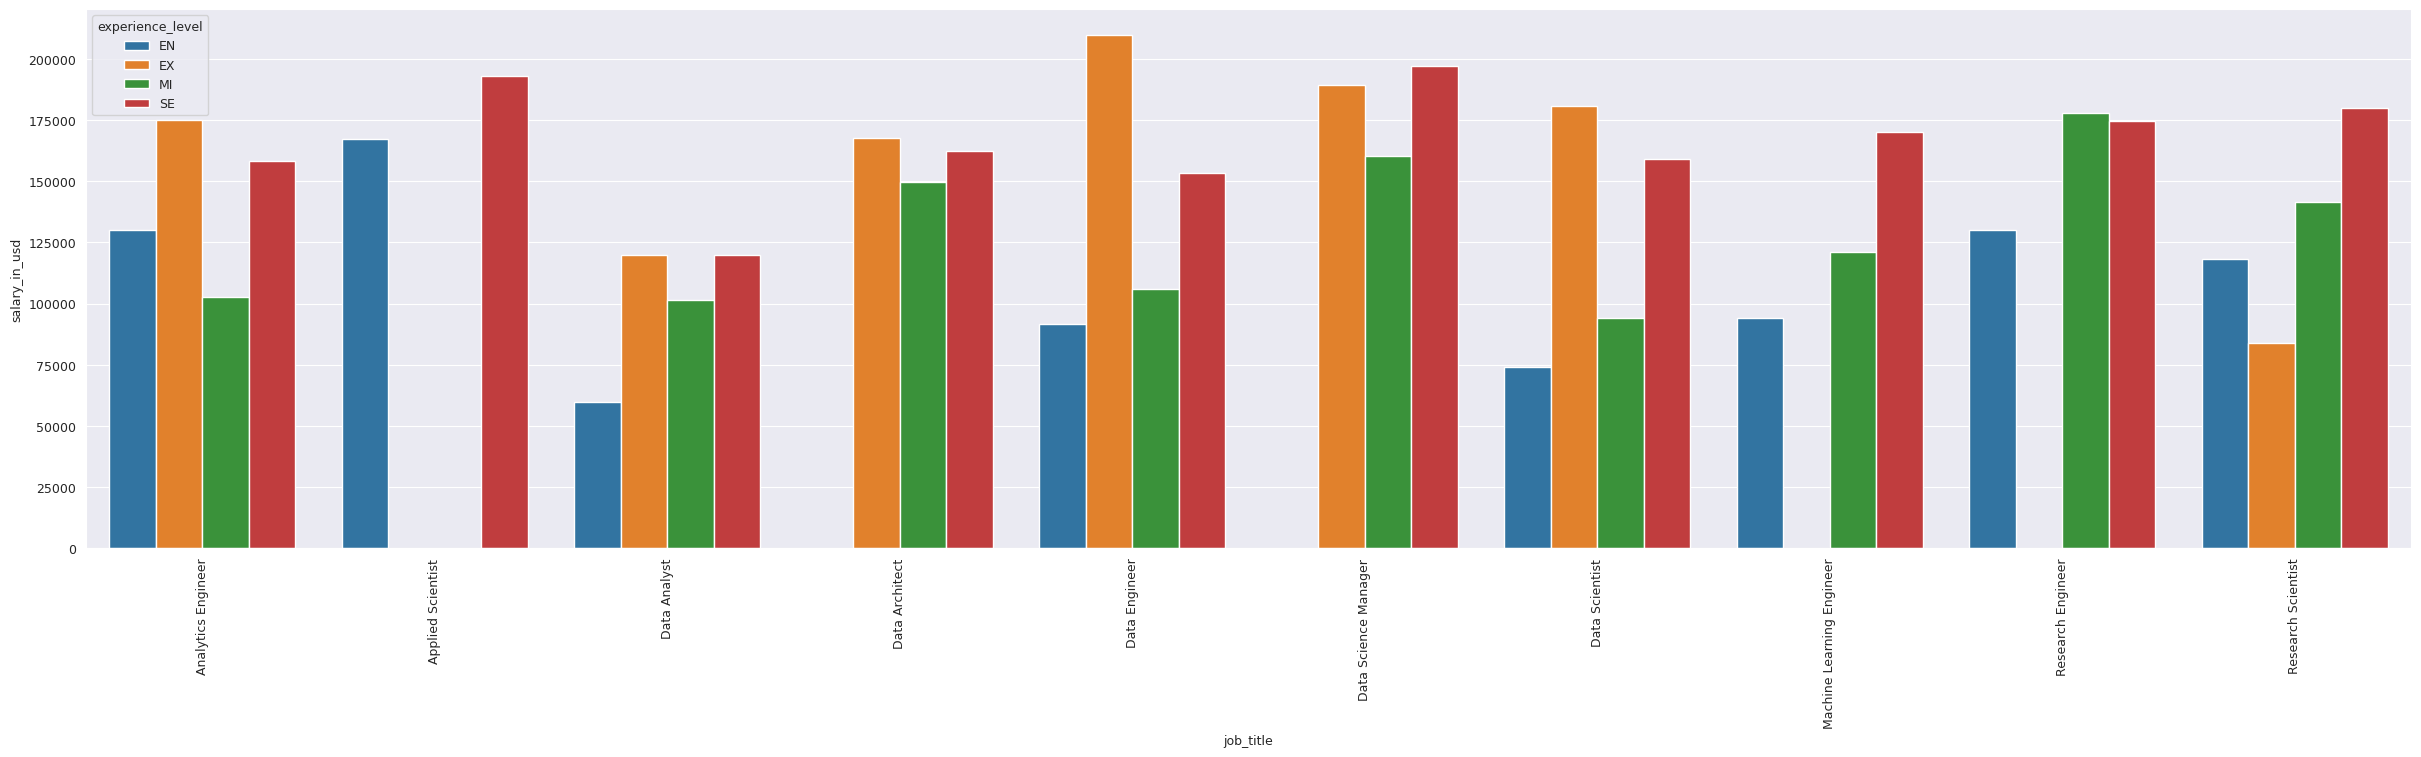

In [150]:
result = pd.DataFrame(result_top10.groupby(['job_title', 'experience_level'])['salary_in_usd'].mean()).round(0).reset_index()

plt.figure(figsize=(30,7))
plt.xticks(rotation=90)

sns.barplot(data=result, x='job_title', y='salary_in_usd', hue='experience_level')

In [151]:
#experience level과 company size 간 연관성 시각화
cross_tab = pd.crosstab(df['experience_level'], df['company_size'])
cross_tab

company_size,L,M,S
experience_level,,,
EN,100,171,49
EX,13,95,6
MI,134,621,50
SE,207,2266,43


<Axes: xlabel='company_size', ylabel='experience_level'>

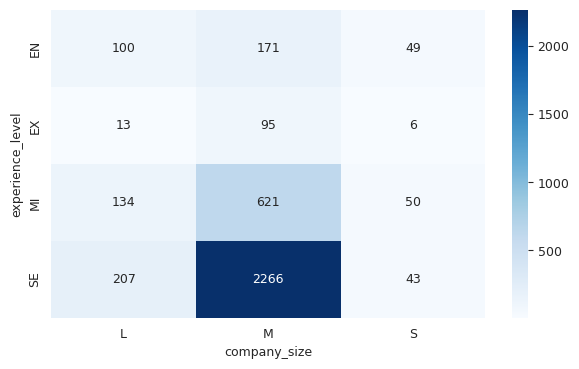

In [152]:
plt.figure(figsize=(7,4))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues') #fmt='d'는 정수, .1f는 소수 한자리까지 의미

In [153]:
#년도별로 Data science 직무를 가진 사람이 얼마나 많아졌는지?
df['work_year'].value_counts()

2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64

<Axes: ylabel='work_year'>

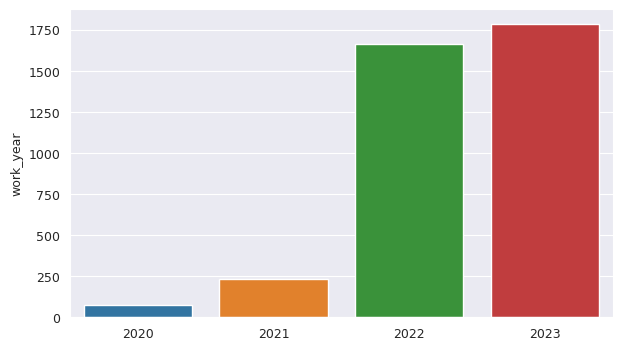

In [154]:
df_year = pd.DataFrame(df['work_year'].value_counts())

plt.figure(figsize=(7,4))
sns.barplot(x=df_year.index, y=df_year['work_year'])

<Axes: ylabel='salary_in_usd'>

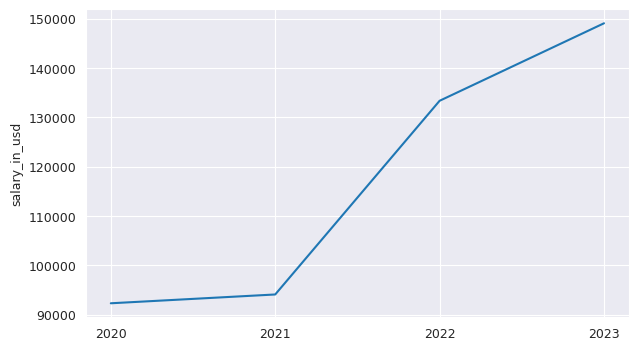

In [155]:
#년도별로 평균 급여가 얼마나 상승했는지?
salary_mean = pd.DataFrame(df.groupby('work_year')['salary_in_usd'].mean()).round(0).reset_index()

plt.figure(figsize=(7,4))
sns.lineplot(data=salary_mean, x=['2020', '2021', '2022', '2023'], y='salary_in_usd')

# Modeling

In [156]:
#데이터 전처리
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [157]:
#범주형 변수 -> 수치형 변환(라벨인코더 사용)
cat_col = df.select_dtypes(include='object').columns.tolist()

encoder = LabelEncoder()
for col in cat_col :
  df[col] = encoder.fit_transform(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   work_year           3755 non-null   int64
 1   experience_level    3755 non-null   int64
 2   employment_type     3755 non-null   int64
 3   job_title           3755 non-null   int64
 4   salary              3755 non-null   int64
 5   salary_currency     3755 non-null   int64
 6   salary_in_usd       3755 non-null   int64
 7   employee_residence  3755 non-null   int64
 8   remote_ratio        3755 non-null   int64
 9   company_location    3755 non-null   int64
 10  company_size        3755 non-null   int64
dtypes: int64(11)
memory usage: 322.8 KB


In [158]:
df.describe()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,3755.000000,3755.000000,3755.000000,3755.000000,3.755000e+03,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000
mean,2022.373635,2.469241,1.996538,39.661784,1.906956e+05,17.409587,137570.389880,66.149401,46.271638,62.117177,0.918509
std,0.691448,0.906261,0.133550,18.536695,6.716765e+05,4.062710,63055.625278,19.235212,48.589050,17.495432,0.392071
min,2020.000000,0.000000,0.000000,0.000000,6.000000e+03,0.000000,5132.000000,0.000000,0.000000,0.000000,0.000000
25%,2022.000000,2.000000,2.000000,27.000000,1.000000e+05,19.000000,95000.000000,75.000000,0.000000,70.000000,1.000000
50%,2022.000000,3.000000,2.000000,33.000000,1.380000e+05,19.000000,135000.000000,75.000000,0.000000,70.000000,1.000000
75%,2023.000000,3.000000,2.000000,47.000000,1.800000e+05,19.000000,175000.000000,75.000000,100.000000,70.000000,1.000000
max,2023.000000,3.000000,3.000000,92.000000,3.040000e+07,19.000000,450000.000000,77.000000,100.000000,71.000000,2.000000


<Axes: >

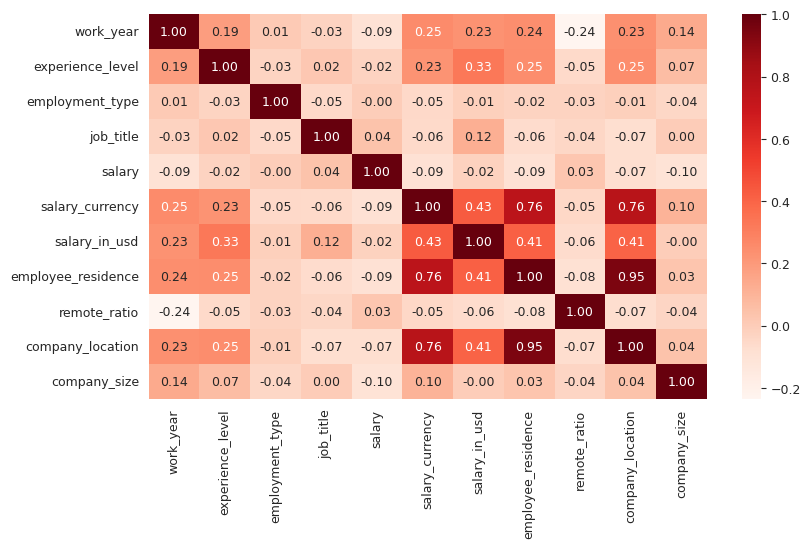

In [159]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Reds')

In [160]:
#employee_residence와 강한 양의 상관관계를 가지는 company_location과 salary_currency 변수 삭제
df = df.drop(columns=['company_location', 'salary_currency', 'salary'])
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_size
0,2023,3,2,84,85847,26,100,0
1,2023,2,0,66,30000,75,100,2
2,2023,2,0,66,25500,75,100,2
3,2023,3,2,47,175000,11,100,1
4,2023,3,2,47,120000,11,100,1
...,...,...,...,...,...,...,...,...
3750,2020,3,2,47,412000,75,100,0
3751,2021,2,2,84,151000,75,100,0
3752,2020,0,2,47,105000,75,100,2
3753,2020,0,0,17,100000,75,100,0


In [161]:
#target
Y = df['salary_in_usd']
df = df.drop(columns=['salary_in_usd'])

#train, test 분리
test = df.tail(1000)
len_row = len(df) - 1000
train = df.head(len_row)
print(len(train), len(test))
test_y = Y[-1000:]
train_y = Y[:len_row]
print(len(train_y), len(test_y))

2755 1000
2755 1000


In [162]:
!pip install optuna

In [163]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [164]:
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

In [187]:
#optuna로 하이퍼 파라미터 값 조정

def objective_model(trial : Trial) :
  param = {
      'n_estimators' : trial.suggest_int('n_estimators', 100, 4000),
      'max_depth' : trial.suggest_int('max_depth', 8, 100),
      'min_child_weight' : trial.suggest_int('min_child_weight', 1, 400),
      'learning_rate' : trial.suggest_float('learning_rate', 1e-6, 1.0),
      'colsample_bytree' : trial.suggest_float('colsample_bytree', 0.5, 1.0),
      'subsample' : trial.suggest_float('subsample', 0.3, 1.0),
      'random_state' : 40
  }

  x_train, x_val, y_train, y_val = train_test_split(train, train_y, test_size=0.2, shuffle=True, random_state=7)

  model_xgb = XGBRegressor(**param)
  model_xgb.fit(x_train, y_train,
                eval_set=[(x_train, y_train), (x_val, y_val)],
                early_stopping_rounds=100,
                verbose=False)
  #model_lgb = LGBMRegressor(**param)
  #model_lgb.fit(x_train, y_train,
  #            eval_set=[(x_train, y_train), (x_val, y_val)],
  #             early_stopping_rounds=100,
  #             verbose=False)


  score_xgb = np.sqrt(mean_squared_error(model_xgb.predict(x_val), y_val))
  #score_lgb = np.sqrt(mean_squared_error(model_lgb.predict(x_val), y_val))


  return score_xgb

In [180]:
#xgb
study = optuna.create_study(direction='minimize', study_name='xgb_parameter_opt', sampler=TPESampler(seed=42))

study.optimize(objective_model, n_trials = 10) #n_trial : 시도횟수 (Key interrupt가 있을때까지 무한반복)
print('Best trial : score {}, \nparams {}'.format(study.best_trial.value, study.best_trial.params))

[I 2023-06-28 07:16:15,656] A new study created in memory with name: xgb_parameter_opt
[I 2023-06-28 07:16:18,401] Trial 0 finished with value: 55464.56862967252 and parameters: {'n_estimators': 1561, 'max_depth': 96, 'min_child_weight': 293, 'learning_rate': 0.5986588855385524, 'colsample_bytree': 0.5780093202212182, 'subsample': 0.40919616423534183}. Best is trial 0 with value: 55464.56862967252.
[I 2023-06-28 07:16:18,967] Trial 1 finished with value: 51102.227843007815 and parameters: {'n_estimators': 326, 'max_depth': 88, 'min_child_weight': 241, 'learning_rate': 0.7080728697234677, 'colsample_bytree': 0.5102922471479012, 'subsample': 0.978936896513396}. Best is trial 1 with value: 51102.227843007815.
[I 2023-06-28 07:16:19,362] Trial 2 finished with value: 49612.00700511192 and parameters: {'n_estimators': 3347, 'max_depth': 27, 'min_child_weight': 73, 'learning_rate': 0.18340532644892396, 'colsample_bytree': 0.6521211214797689, 'subsample': 0.6673295021425665}. Best is trial 2 w

Best trial : score 49218.01318462665, 
params {'n_estimators': 2432, 'max_depth': 93, 'min_child_weight': 36, 'learning_rate': 0.1959836664362828, 'colsample_bytree': 0.522613644455269, 'subsample': 0.527731231534285}


In [ ]:
model_xgb = XGBRegressor(n_estimators=2432, max_depth=93, min_child_weight=36, learning_rate= 0.196, colsample_bytree=0.523, subsample = 0.528, random_state=10)
model_xgb.fit(train, train_y)
pred = model_xgb.predict(test)
print('RMSE : ', np.sqrt(mean_squared_error(pred, test_y)))

RMSE :  51866.62998993694


In [188]:
#lgbm
study = optuna.create_study(direction='minimize', sampler=TPESampler(seed=42))

study.optimize(objective_model, n_trials = 10) #n_trial : 시도횟수 (Key interrupt가 있을때까지 무한반복)
print('Best trial : score {}, \nparams {}'.format(study.best_trial.value, study.best_trial.params))

[I 2023-06-28 07:23:39,086] A new study created in memory with name: no-name-b9a09335-30a5-46f5-bc63-6ea0488701bd
[I 2023-06-28 07:23:39,130] Trial 0 finished with value: 51754.39927107615 and parameters: {'n_estimators': 1561, 'max_depth': 96, 'min_child_weight': 293, 'learning_rate': 0.5986588855385524, 'colsample_bytree': 0.5780093202212182, 'subsample': 0.40919616423534183}. Best is trial 0 with value: 51754.39927107615.
[I 2023-06-28 07:23:39,170] Trial 1 finished with value: 51788.45790159661 and parameters: {'n_estimators': 326, 'max_depth': 88, 'min_child_weight': 241, 'learning_rate': 0.7080728697234677, 'colsample_bytree': 0.5102922471479012, 'subsample': 0.978936896513396}. Best is trial 0 with value: 51754.39927107615.
[I 2023-06-28 07:23:39,303] Trial 2 finished with value: 49809.93356325557 and parameters: {'n_estimators': 3347, 'max_depth': 27, 'min_child_weight': 73, 'learning_rate': 0.18340532644892396, 'colsample_bytree': 0.6521211214797689, 'subsample': 0.66732950214

Best trial : score 49277.68582283878, 
params {'n_estimators': 2470, 'max_depth': 23, 'min_child_weight': 27, 'learning_rate': 0.948885588367796, 'colsample_bytree': 0.9828160165372797, 'subsample': 0.8658781436815228}


In [189]:
model_lgb = LGBMRegressor(n_estimators=2470, max_depth=23, min_child_weight=27, learning_rate= 0.948885588367796, colsample_bytree=0.9828160165372797, subsample = 0.8658781436815228, random_state=14)
model_lgb.fit(train, train_y)
pred_2 = model_lgb.predict(test)
print('RMSE : ', np.sqrt(mean_squared_error(pred_2, test_y)))

RMSE :  56174.02340976832


lightgbm의 경우 데이터 셋이 작을 때 과적합의 위험이 존재한다. 실제로도 모델을 돌려봤을 때 검증데이터로 구해진 RMSE와 테스트 데이터로 구해진 RMSE값의 차이가 xgboost는 작으나, lightgbm은 큰 것을 볼 수 있다. 최종 모델로 xgboost를 선택하는 것이 타당한 것으로 보인다.